In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.fftpack import fft, ifft
from scipy.signal.windows import hann
from numpy import sin, cos, sqrt, exp, pi

In [211]:
# given an fft, plot the ampltiude spectrum
def plot_amplitude(fft, ax=None):
    frequencies = get_frequencies(fft)

    if ax != None:
        ax.stem(frequencies, np.abs(fft), 'b', markerfmt=" ", basefmt='-b')
        ax.set_xlim([0, 5]);
        ax.set_xlabel("Frequency (Hz)")
        ax.set_ylabel("Amplitude")
        ax.set_title(f"Amplitude vs. Frequency (samples={len(fft)})");
    else:
        plt.stem(frequencies, np.abs(fft), 'b', markerfmt=" ", basefmt='-b')
        plt.xlim([0, 5]);
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Amplitude")
        plt.title(f"Amplitude vs. Frequency (samples={len(fft)})");

# given an fft, returns the frequencies to use as the x-axis of amplitude spectrum
def get_frequencies(fft):
    N = len(fft)
    cycles = np.arange(N)
    T = N / 100
    frequencies = cycles / T
    return frequencies

# plots the amplitude of the fft of a sine wave with a given frequency and sampling rate
# returns the wave and its fft
def plot_sine_amp(interval=0.01, frequency=1, num_samples=300, ax=None):    
    t = np.arange(0, interval*num_samples, interval)
    wave = sin(2 * pi * freq * t)

    fft_wave = fft(wave)

    plot_amplitude(fft_wave, ax)

    return (wave, fft_wave)

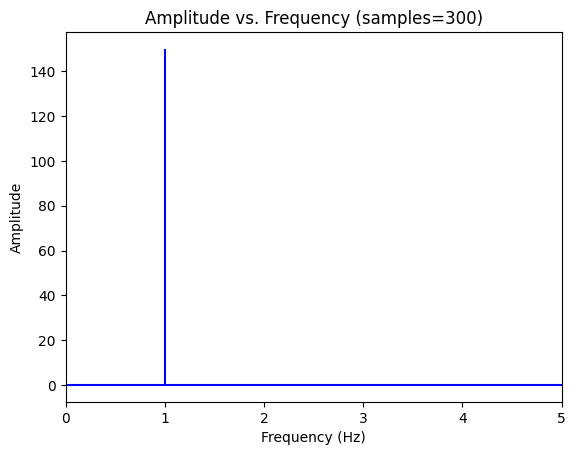

In [212]:
# 1i

wave_300, fft_300 = plot_sine_amp()

The amplitude spectrum of the first 275 samples looks different than the full 300 samples because it includes a partial wavelength. Because the sampling interval is 0.01, the amplitude spectrum will only have the perfect spike seen with the full 300 samples when the number of samples is a multiple of 100.


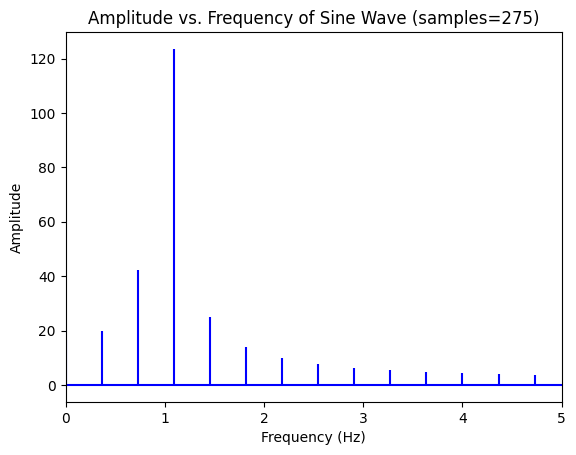

In [127]:
# 1ii

wave_275, fft_275 = plot_sine_amp(num_samples=275)

print("The amplitude spectrum of the first 275 samples looks different than the full 300 samples because it includes a partial wavelength. Because the sampling interval is 0.01, the amplitude spectrum will only have the perfect spike seen with the full 300 samples when the number of samples is a multiple of 100.")

This amplitude spectrum shows the noise that is introduced when the data is padded with zeros. We can see the expected spike at 1 Hz with repeating, smaller spikes on either side that get closer and closer to zero as the frequency gets farther away from 1 Hz.


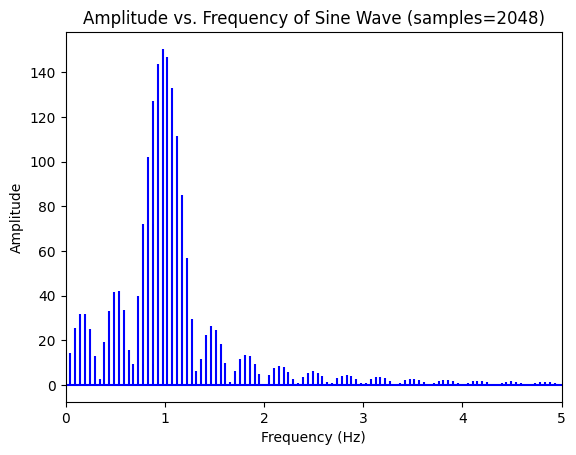

In [207]:
# 1iii

wave_300_padded = np.append(wave_300, np.zeros(1748))
fft_300_padded = fft(wave_300_padded)

plot_amplitude(fft_300_padded)

print("This amplitude spectrum shows the noise that is introduced when the data is padded with zeros. We can see the expected spike at 1 Hz with repeating, smaller spikes on either side that get closer and closer to zero as the frequency gets farther away from 1 Hz.")

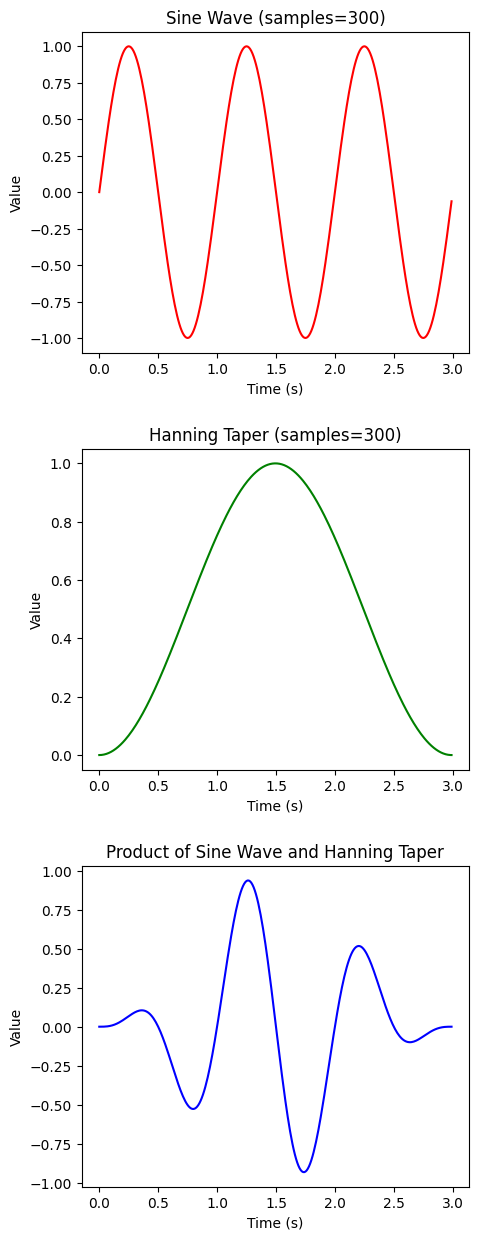

In [208]:
# 1iv

hanning_taper_300 = hann(300)
tapered_wave_300 = wave_300 * hanning_taper_300

fig, axes = plt.subplots(3, 1, figsize=(5, 15))

axes[0].plot(t, wave_300, c='r')
axes[1].plot(t, hanning_taper, c='g')
axes[2].plot(t, wave_300 * hanning_taper, 'b');

axes[0].set_title("Sine Wave (samples=300)")
axes[1].set_title("Hanning Taper (samples=300)")
axes[2].set_title("Product of Sine Wave and Hanning Taper")

for ax in axes:
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Value");

plt.subplots_adjust(wspace=0.3, hspace=0.3)

The amplitude spectrum of the tapered sine wave is very similar to the untapered wave, but is noticeably different.
The tapered wave has two additional spikes on either side of 1 Hz, about half the height of the main spike at 1 Hz.


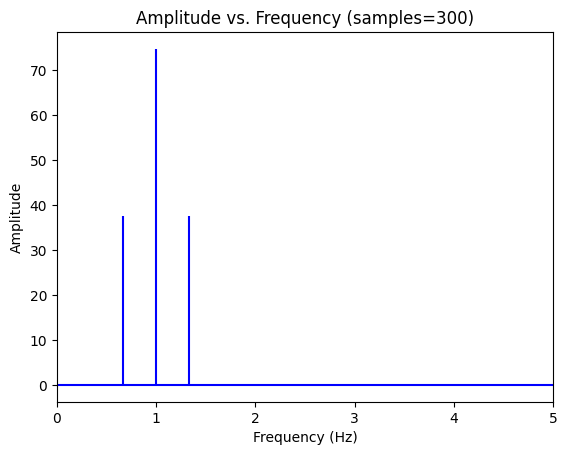

In [231]:
# 1v

plot_amplitude(fft(tapered_wave_300))
print("The amplitude spectrum of the tapered sine wave is very similar to the untapered wave, but is noticeably different.")
print("The tapered wave has two additional spikes on either side of 1 Hz, about half the height of the main spike at 1 Hz.")

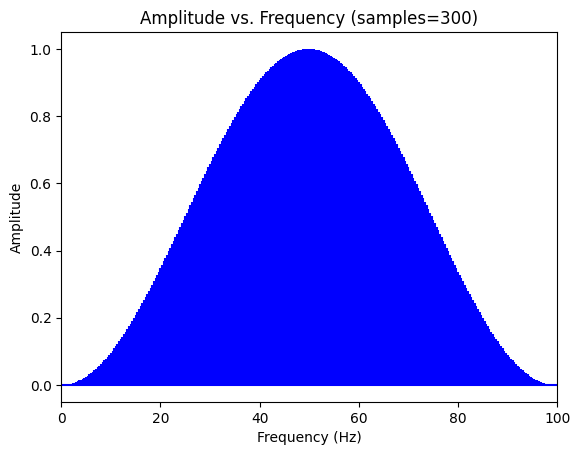

In [223]:
# 1vi

plot_amplitude(hanning_taper_300)
plt.xlim([0, 100]);

print("The amplitude spectrum of the Hanning taper is a normal distribution.")

###########
# EXPLAIN #
###########

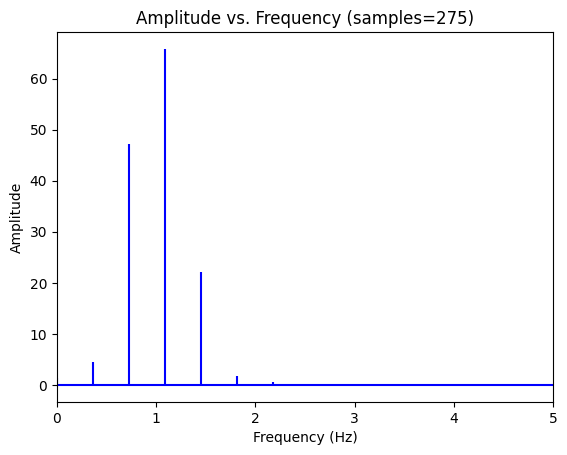

In [233]:
# 1vii

hanning_taper_275 = hann(275)
tapered_wave_275 = hanning_taper_275 * wave_275

plot_amplitude(fft(tapered_wave_275))

###########
# EXPLAIN #
###########

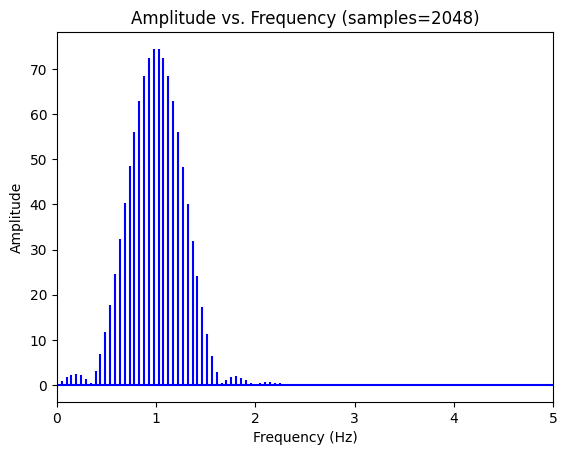

In [232]:
# 1viii

tapered_padded = np.append(tapered_wave, np.zeros(1748))
plot_amplitude(fft(tapered_padded))

###########
# EXPLAIN #
###########